Q1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("Iris.csv")

# Drop the 'Id' column
df = df.drop(columns=['Id'])

# Separate features and target
X = df.drop(columns=['Species'])
y = df['Species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train a linear SVC classifier
svc_linear = SVC(kernel='linear', random_state=42)
svc_linear.fit(X_train, y_train)

# Predict and evaluate
y_pred = svc_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)


Accuracy: 100.00%
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Q2

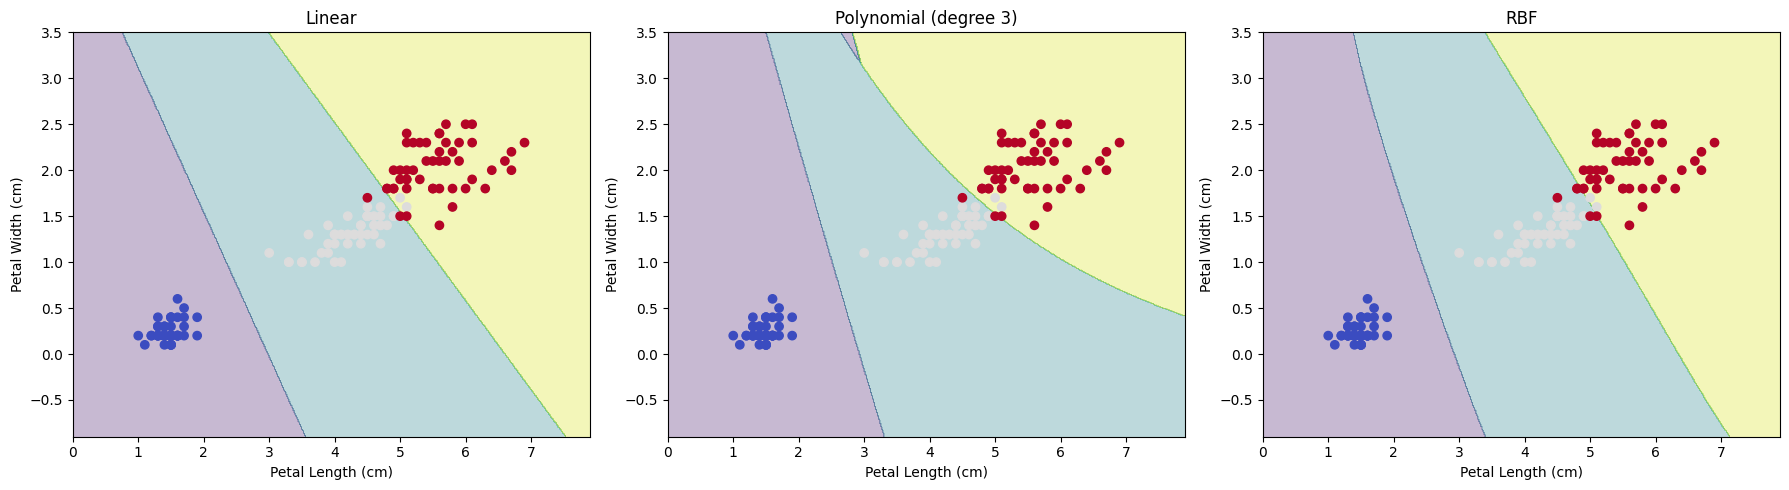

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv("Iris.csv")

# Select 2 features for visualization
X = df[["PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])

# Define classifiers with different kernels
kernels = {
    "Linear": SVC(kernel="linear", C=1.0),
    "Polynomial (degree 3)": SVC(kernel="poly", degree=3, C=1.0),
    "RBF": SVC(kernel="rbf", gamma='scale', C=1.0)
}

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Plot decision boundaries
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axs, kernels.items()):
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    ax.set_title(name)
    ax.set_xlabel("Petal Length (cm)")
    ax.set_ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()


Q3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("Iris.csv")

# Features and target
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVC models with different kernels
models = {
    "Linear": SVC(kernel="linear", C=1.0),
    "Polynomial (degree 3)": SVC(kernel="poly", degree=3, C=1.0),
    "RBF": SVC(kernel="rbf", gamma='scale', C=1.0)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Kernel Accuracy: {accuracy * 100:.2f}%")


Linear Kernel Accuracy: 100.00%
Polynomial (degree 3) Kernel Accuracy: 100.00%
RBF Kernel Accuracy: 100.00%


Q4


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Iris.csv")
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter distribution
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
    'kernel': ['rbf']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy',
                                   random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best model and accuracy
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", random_search.best_params_)
print(f"Improved Accuracy: {accuracy * 100:.2f}%")


Best Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}
Improved Accuracy: 100.00%
